# Problem Statement : 
As a data scientist of a leading decision analysis firm you are required to predict the potential global user of the game based on the data provided by the customer so that they can plan their global launch.

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# IMPORTING THE DATSETS

In [2]:
train_data=pd.read_csv(r'C:\Users\LENOVO\Downloads\Train.csv',index_col=None,header=0)
train_data.head()
test_data=pd.read_csv(r'C:\Users\LENOVO\Downloads\Test.csv',index_col=None,header=0)
test_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


In [3]:
print(train_data.shape)
print(test_data.shape)

(14576, 15)
(2143, 14)


# CHECKING NULL VALUES

In [4]:
train_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [5]:
test_data.isnull().sum()

Name                  0
Platform              0
Year_of_Release      37
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       1223
Critic_Count       1223
User_Score          888
User_Count         1349
Developer           876
Rating              897
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2143 non-null   object 
 1   Platform         2143 non-null   object 
 2   Year_of_Release  2106 non-null   float64
 3   Genre            2143 non-null   object 
 4   Publisher        2138 non-null   object 
 5   NA_Sales         2143 non-null   float64
 6   EU_Sales         2143 non-null   float64
 7   JP_Sales         2143 non-null   float64
 8   Critic_Score     920 non-null    float64
 9   Critic_Count     920 non-null    float64
 10  User_Score       1255 non-null   object 
 11  User_Count       794 non-null    float64
 12  Developer        1267 non-null   object 
 13  Rating           1246 non-null   object 
dtypes: float64(7), object(7)
memory usage: 234.5+ KB


# CHECKING FOR UNIQUE VALUES

In [8]:
for i in train_data.columns:
    print({i:train_data[i].unique()})

{'Name': array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)}
{'Platform': array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)}
{'Year_of_Release': array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])}
{'Genre': array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)}
{'Publisher':

       24., 17., 13.])}
{'Critic_Count': array([ 51.,  nan,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,
        58.,  62.,  37.,  54.,  81.,  89.,  21., 100.,  39.,  56.,  66.,
        57.,  86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  20.,
        87.,  23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,
        38.,  12.,  90.,  97.,  44., 105.,  77.,  68.,  28.,  94.,  96.,
        61.,  22.,  88.,  47.,  98.,  85.,  13.,   8.,  95.,  17.,  35.,
        19.,  48.,  14., 113.,  83.,  72.,  30.,  69.,  76.,  18.,  34.,
        40., 101.,   9.,  32.,  78.,  36.,  25.,  59.,  31.,  79.,  26.,
        49.,  60.,  11.,  43., 107.,   7.,  71.,  55.,  52.,  92.,   4.,
        93.,   5.,   6., 103., 102., 106.,   3., 104.])}
{'User_Score': array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       

In [9]:
for i in test_data.columns:
    print({i:test_data[i].unique()})

{'Name': array(['Nicktoons: MLB', "Shonen Jump's One Piece: Grand Battle",
       'Learn Math', ..., 'Theresia...', 'Sacred 2: Fallen Angel',
       'Dance Sensation!'], dtype=object)}
{'Platform': array(['X360', 'PS2', 'DS', 'Wii', 'GBA', 'PS', 'PSV', 'XB', '3DS', 'PSP',
       'PS3', 'PC', 'XOne', 'GC', 'SAT', 'PS4', 'SNES', 'N64', 'WiiU',
       '2600', 'DC', 'GEN', 'NG', 'GB', 'SCD', 'NES'], dtype=object)}
{'Year_of_Release': array([2011., 2005., 2009., 2008., 2010., 1995., 2016., 2004., 1997.,
       2007., 2015., 2000., 2013., 2003., 2001.,   nan, 1998., 2014.,
       2002., 2006., 2012., 1992., 1993., 1999., 1981., 1996., 1994.,
       1991., 1987.])}
{'Genre': array(['Sports', 'Fighting', 'Puzzle', 'Racing', 'Misc', 'Role-Playing',
       'Adventure', 'Strategy', 'Action', 'Simulation', 'Platform',
       'Shooter'], dtype=object)}
{'Publisher': array(['Take-Two Interactive', 'Atari', 'DreamCatcher Interactive',
       'Ubisoft', 'Avanquest', 'Konami Digital Entertainment',
   

In [10]:
train_data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
count,14344.000000,14576.000000,14576.000000,14576.000000,7217.000000,7217.000000,6796.000000,14576.000000
mean,2006.437117,0.295577,0.163957,0.085659,69.676043,27.312041,172.513096,0.598972
std,5.955664,0.866491,0.536354,0.329646,13.773391,19.464196,576.609716,1.647699
min,1980.000000,0.000000,0.000000,0.000000,13.000000,3.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,61.000000,12.000000,11.000000,0.050000
50%,2007.000000,0.100000,0.030000,0.000000,71.000000,22.000000,27.000000,0.220000
75%,2010.000000,0.280000,0.130000,0.030000,80.000000,38.000000,89.000000,0.550000
max,2020.000000,41.360000,28.960000,10.220000,98.000000,113.000000,10665.000000,82.530000


In [11]:
test_data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count
count,2106.000000,2143.000000,2143.000000,2143.000000,920.000000,920.000000,794.000000
mean,2006.829535,0.043999,0.016253,0.022804,63.410870,18.898913,74.214106
std,5.316215,0.036211,0.020982,0.038525,13.981594,12.320334,396.643314
min,1981.000000,0.000000,0.000000,0.000000,19.000000,4.000000,4.000000
25%,2004.000000,0.000000,0.000000,0.000000,55.000000,9.000000,7.000000
50%,2008.000000,0.050000,0.010000,0.000000,65.000000,17.000000,12.000000
75%,2011.000000,0.070000,0.030000,0.060000,73.000000,25.000000,27.000000
max,2016.000000,0.120000,0.130000,0.130000,92.000000,77.000000,9851.000000


In [12]:
train_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Global_Sales'],
      dtype='object')

In [13]:
# define function to check null values prcentage for each coloumn
def null_values(x):
    percent_missing = x.isnull().sum() * 100 / len(x)
    missing_value_x = pd.DataFrame({'column_name': x.columns,
                                 'percent_missing': percent_missing})
    print(missing_value_x)

In [14]:
null_values(train_data)

                     column_name  percent_missing
Name                        Name         0.013721
Platform                Platform         0.000000
Year_of_Release  Year_of_Release         1.591658
Genre                      Genre         0.013721
Publisher              Publisher         0.336169
NA_Sales                NA_Sales         0.000000
EU_Sales                EU_Sales         0.000000
JP_Sales                JP_Sales         0.000000
Critic_Score        Critic_Score        50.487102
Critic_Count        Critic_Count        50.487102
User_Score            User_Score        39.901207
User_Count            User_Count        53.375412
Developer              Developer        39.427827
Rating                    Rating        40.285401
Global_Sales        Global_Sales         0.000000


In [15]:
null_values(test_data)

                     column_name  percent_missing
Name                        Name         0.000000
Platform                Platform         0.000000
Year_of_Release  Year_of_Release         1.726552
Genre                      Genre         0.000000
Publisher              Publisher         0.233318
NA_Sales                NA_Sales         0.000000
EU_Sales                EU_Sales         0.000000
JP_Sales                JP_Sales         0.000000
Critic_Score        Critic_Score        57.069529
Critic_Count        Critic_Count        57.069529
User_Score            User_Score        41.437238
User_Count            User_Count        62.949137
Developer              Developer        40.877275
Rating                    Rating        41.857210


# TREATING THE NULL VALUES

In [16]:
train_data.drop_duplicates(subset='Name', keep='first', inplace=True)

print(train_data.shape)

(10328, 15)


In [17]:
test_data.drop_duplicates(subset='Name', keep='first', inplace=True)

print(test_data.shape)

(1988, 14)


In [18]:
# deleate tbd from user score and replace it with nan to replace nan with appopreate number latter
train_data['User_Score']=train_data['User_Score'].replace('tbd', np.NaN)

#convert user score to float insted of string
train_data.User_Score=train_data.User_Score.values.astype(float)

In [19]:
# deleate tbd from user score and replace it with nan to replace nan with appopreate number latter
test_data['User_Score']=test_data['User_Score'].replace('tbd', np.NaN)

#convert user score to float insted of string
test_data.User_Score=test_data.User_Score.values.astype(float)

# FILLING THE NULL VALUES

In [20]:
#since null values is exceeding 30%-51% in these coloums 
#if the numeric colom is close to the mean fill nan with mean else fill it with median
#fill nan in categorical data by mode or median

# since the coloums has no outliers we obtain mean value to null values in the coloumns
train_data['Critic_Score'] = train_data['Critic_Score'].fillna(train_data['Critic_Score'].mean())
train_data['Critic_Count'] = train_data['Critic_Count'].fillna(train_data['Critic_Count'].mean())
train_data['User_Score'] = train_data['User_Score'].fillna(train_data['User_Score'].mean())  

# since the coloums has outliers we obtain median value to null values in the coloumns
train_data['User_Count'] = train_data['User_Count'].fillna(train_data['User_Count'].median())

# since the coloums has categorical data we obtain mode value to null values in the coloumns
train_data['Rating'] = train_data['Rating'].fillna(train_data['Rating'].mode().iat[0])
train_data['Developer'] = train_data['Developer'].fillna(train_data['Developer'].mode().iat[0])
train_data['Publisher'] = train_data['Publisher'].fillna(train_data['Publisher'].mode().iat[0])
train_data['Genre'] = train_data['Genre'].fillna(train_data['Genre'].mode().iat[0])


In [21]:
#since null values is exceeding 30%-51% in these coloums 
#if the numeric colom is close to the mean fill nan with mean else fill it with median
#fill nan in categorical data by mode or median

# since the coloums has no outliers we obtain mean value to null values in the coloumns
test_data['Critic_Score'] = test_data['Critic_Score'].fillna(test_data['Critic_Score'].mean())
test_data['Critic_Count'] = test_data['Critic_Count'].fillna(test_data['Critic_Count'].mean())
test_data['User_Score'] = test_data['User_Score'].fillna(test_data['User_Score'].mean())  

# since the coloums has outliers we obtain median value to null values in the coloumns
test_data['User_Count'] = test_data['User_Count'].fillna(test_data['User_Count'].median())

# since the coloums has categorical data we obtain mode value to null values in the coloumns
test_data['Rating'] = test_data['Rating'].fillna(test_data['Rating'].mode().iat[0])
test_data['Developer'] = test_data['Developer'].fillna(test_data['Developer'].mode().iat[0])
test_data['Publisher'] = test_data['Publisher'].fillna(test_data['Publisher'].mode().iat[0])
test_data['Genre'] = test_data['Genre'].fillna(test_data['Genre'].mode().iat[0])

In [22]:
train_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.000000,51.000000,8.000000,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,69.412253,29.579892,7.333805,29.0,Ubisoft,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.000000,73.000000,8.300000,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.000000,73.000000,8.000000,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,69.412253,29.579892,7.333805,29.0,Ubisoft,E,31.37


In [23]:
test_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,63.794293,19.241379,7.600000,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,63.794293,19.241379,6.943094,12.0,Ubisoft,E
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,63.794293,19.241379,6.943094,12.0,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.000000,22.000000,7.100000,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,63.794293,19.241379,6.943094,12.0,Activision,E


In [24]:
train_data=train_data.drop(columns=['Year_of_Release'], axis=1)
train_data

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,76.000000,51.000000,8.000000,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,69.412253,29.579892,7.333805,29.0,Ubisoft,E,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,82.000000,73.000000,8.300000,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,80.000000,73.000000,8.000000,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,69.412253,29.579892,7.333805,29.0,Ubisoft,E,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14566,15 Days,PC,Adventure,DTP Entertainment,0.00,0.01,0.00,63.000000,6.000000,5.800000,8.0,DTP Entertainment,E,0.01
14568,Aiyoku no Eustia,PSV,Misc,dramatic create,0.00,0.00,0.01,69.412253,29.579892,7.333805,29.0,Ubisoft,E,0.01
14569,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,69.412253,29.579892,7.333805,29.0,Ubisoft,E,0.01
14572,LMA Manager 2007,X360,Sports,Codemasters,0.00,0.01,0.00,69.412253,29.579892,7.333805,29.0,Ubisoft,E,0.01


In [25]:
train_data.isnull().sum()

Name            1
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
Global_Sales    0
dtype: int64

In [26]:
test_data=test_data.drop(columns=['Year_of_Release'], axis=1)
test_data

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,Sports,Take-Two Interactive,0.12,0.00,0.0,63.794293,19.241379,7.600000,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,Fighting,Atari,0.07,0.05,0.0,63.794293,19.241379,6.943094,12.0,Ubisoft,E
2,Learn Math,DS,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,63.794293,19.241379,6.943094,12.0,Dreamcatcher,E
3,Nitrobike,Wii,Racing,Ubisoft,0.11,0.01,0.0,49.000000,22.000000,7.100000,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,Puzzle,Avanquest,0.12,0.00,0.0,63.794293,19.241379,6.943094,12.0,Activision,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,PoPoLoCrois,PSP,Role-Playing,Ignition Entertainment,0.05,0.00,0.0,66.000000,41.000000,7.400000,17.0,G-Artists,E
2137,Dragon Rage,PS2,Shooter,3DO,0.03,0.02,0.0,50.000000,9.000000,6.400000,9.0,3DO,T
2138,Theresia...,DS,Adventure,Arc System Works,0.05,0.00,0.0,61.000000,6.000000,8.000000,8.0,WorkJam,M
2139,Sacred 2: Fallen Angel,PC,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.0,71.000000,41.000000,6.900000,203.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M


In [27]:
test_data.isnull().sum()

Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
dtype: int64

In [28]:
test_data.shape

(1988, 13)

# COUNT PLOT WITH RATING FOR EDA

<AxesSubplot:xlabel='Rating', ylabel='count'>

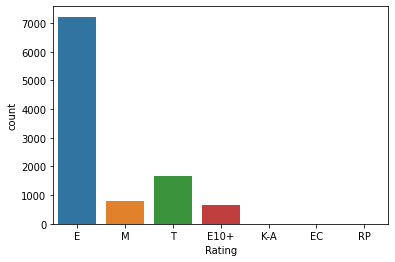

In [29]:
sns.countplot(x='Rating',data=train_data)

<AxesSubplot:xlabel='Rating', ylabel='count'>

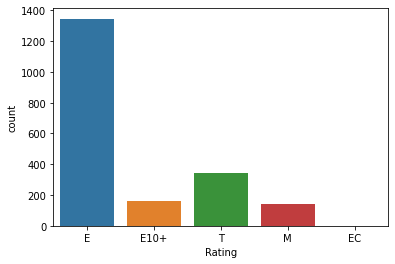

In [30]:
sns.countplot(x='Rating',data=test_data)

In [31]:
colname=[]
for x in train_data.columns:
    if train_data[x].dtype=='object':
        colname.append(x)
colname

['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

In [32]:
colname=['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

# CONVERTING CATEGORICAL TO NUMERICAL

In [33]:
#for preprocessing the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in colname:
    train_data[x]=le.fit_transform(train_data[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    

Feature Platform
mapping {'2600': 0, '3DO': 1, '3DS': 2, 'DC': 3, 'DS': 4, 'GB': 5, 'GBA': 6, 'GC': 7, 'GEN': 8, 'GG': 9, 'N64': 10, 'NES': 11, 'NG': 12, 'PC': 13, 'PCFX': 14, 'PS': 15, 'PS2': 16, 'PS3': 17, 'PS4': 18, 'PSP': 19, 'PSV': 20, 'SAT': 21, 'SCD': 22, 'SNES': 23, 'TG16': 24, 'WS': 25, 'Wii': 26, 'WiiU': 27, 'X360': 28, 'XB': 29, 'XOne': 30}
Feature Genre
mapping {'Action': 0, 'Adventure': 1, 'Fighting': 2, 'Misc': 3, 'Platform': 4, 'Puzzle': 5, 'Racing': 6, 'Role-Playing': 7, 'Shooter': 8, 'Simulation': 9, 'Sports': 10, 'Strategy': 11}
Feature Publisher
mapping {'10TACLE Studios': 0, '1C Company': 1, '20th Century Fox Video Games': 2, '2D Boy': 3, '3DO': 4, '49Games': 5, '505 Games': 6, '5pb': 7, '7G//AMES': 8, '989 Sports': 9, '989 Studios': 10, 'AQ Interactive': 11, 'ASC Games': 12, 'ASCII Entertainment': 13, 'ASCII Media Works': 14, 'ASK': 15, 'Acclaim Entertainment': 16, 'Accolade': 17, 'Ackkstudios': 18, 'Acquire': 19, 'Activision': 20, 'Activision Blizzard': 21, 'Activ

In [34]:
#for preprocessing the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in colname:
    test_data[x]=le.fit_transform(test_data[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    

Feature Platform
mapping {'2600': 0, '3DS': 1, 'DC': 2, 'DS': 3, 'GB': 4, 'GBA': 5, 'GC': 6, 'GEN': 7, 'N64': 8, 'NES': 9, 'NG': 10, 'PC': 11, 'PS': 12, 'PS2': 13, 'PS3': 14, 'PS4': 15, 'PSP': 16, 'PSV': 17, 'SAT': 18, 'SCD': 19, 'SNES': 20, 'Wii': 21, 'WiiU': 22, 'X360': 23, 'XB': 24, 'XOne': 25}
Feature Genre
mapping {'Action': 0, 'Adventure': 1, 'Fighting': 2, 'Misc': 3, 'Platform': 4, 'Puzzle': 5, 'Racing': 6, 'Role-Playing': 7, 'Shooter': 8, 'Simulation': 9, 'Sports': 10, 'Strategy': 11}
Feature Publisher
mapping {'10TACLE Studios': 0, '3DO': 1, '505 Games': 2, '5pb': 3, 'ASCII Entertainment': 4, 'Abylight': 5, 'Acclaim Entertainment': 6, 'Ackkstudios': 7, 'Acquire': 8, 'Activision': 9, 'Activision Value': 10, 'Agatsuma Entertainment': 11, 'Agetec': 12, 'Aksys Games': 13, 'Alchemist': 14, 'Alternative Software': 15, 'Altron': 16, 'Angel Studios': 17, 'Aqua Plus': 18, 'Arc System Works': 19, 'Aria': 20, 'ArtDink': 21, 'Ascaron Entertainment GmbH': 22, 'Asgard': 23, 'Asmik Corp': 24

In [35]:
test_data.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,23,10,231,0.12,0.00,0.0,63.794293,19.241379,7.600000,7.0,237,0
1,Shonen Jump's One Piece: Grand Battle,13,2,27,0.07,0.05,0.0,63.794293,19.241379,6.943094,12.0,545,0
2,Learn Math,3,5,63,0.12,0.00,0.0,63.794293,19.241379,6.943094,12.0,157,0
3,Nitrobike,21,6,246,0.11,0.01,0.0,49.000000,22.000000,7.100000,7.0,299,1
4,Cruise Ship Vacation Games,21,5,31,0.12,0.00,0.0,63.794293,19.241379,6.943094,12.0,20,0


In [36]:
train_data.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,26,10,338,41.36,28.96,3.77,76.000000,51.000000,8.000000,322.0,889,0,82.53
1,Super Mario Bros.,11,4,338,29.08,3.58,6.81,69.412253,29.579892,7.333805,29.0,1345,0,40.24
2,Mario Kart Wii,26,6,338,15.68,12.76,3.79,82.000000,73.000000,8.300000,709.0,889,0,35.52
3,Wii Sports Resort,26,10,338,15.61,10.93,3.28,80.000000,73.000000,8.000000,192.0,889,0,32.77
4,Pokemon Red/Pokemon Blue,5,7,338,11.27,8.89,10.22,69.412253,29.579892,7.333805,29.0,1345,0,31.37


In [37]:
trained_data=train_data

In [38]:
x=trained_data.iloc[:,1:-1]
y=trained_data.iloc[:,-1]

In [39]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [40]:
print(x)

[[ 1.40264694  1.354057    0.33971657 ...  0.66936424 -0.30052462
  -0.58103818]
 [-0.49014388 -0.26810988  0.33971657 ... -0.1543747   0.7440839
  -0.58103818]
 [ 1.40264694  0.27261241  0.33971657 ...  1.75737437 -0.30052462
  -0.58103818]
 ...
 [-1.12107415 -0.26810988 -0.19265326 ... -0.1543747   0.7440839
  -0.58103818]
 [ 1.65501905  1.354057   -1.22607704 ... -0.1543747   0.7440839
  -0.58103818]
 [ 0.64553062 -1.07919333 -0.41812754 ... -0.1543747   0.7440839
  -0.58103818]]


# TRAIN TEST SPLIT

In [41]:
from sklearn.model_selection import train_test_split

#split the data into  the test and train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=10)

## test_size is 20%  for less than 1000 obsevation and greater than 1000 30%

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7229, 12)
(7229,)
(3099, 12)
(3099,)


# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(random_state=10)

#fit the model on data and predict the values

model_DecisionTree.fit(x_train,y_train)

y_pred=model_DecisionTree.predict(x_test)

#print(y_pred)
print(list(zip(y_test,y_pred)))

[(0.05, 0.04999999999999993), (1.51, 1.6), (0.35, 0.39), (0.06, 0.049999999999999996), (0.04, 0.04000000000000003), (1.83, 1.76), (0.14, 0.14), (0.02, 0.02), (2.15, 2.14), (0.04, 0.04), (1.04, 1.03), (0.19, 0.19000000000000003), (0.76, 0.84), (1.86, 1.82), (3.83, 2.32), (0.03, 0.04), (0.11, 0.11), (0.05, 0.049999999999999996), (4.48, 4.68), (0.03, 0.03), (0.02, 0.02000000000000001), (4.8, 4.41), (1.67, 2.09), (0.06, 0.1), (1.96, 2.14), (0.03, 0.030000000000000016), (0.02, 0.020000000000000007), (0.04, 0.05000000000000001), (1.64, 1.31), (0.72, 0.72), (0.49, 0.62), (0.83, 0.73), (0.28, 0.28), (1.75, 1.65), (0.11, 0.11000000000000007), (1.88, 1.76), (0.21, 0.2), (0.1, 0.11), (0.33, 0.38000000000000006), (0.18, 0.13), (0.29, 0.24), (0.99, 0.96), (0.8, 0.83), (0.23, 0.24), (0.19, 0.19), (0.1, 0.11), (0.78, 0.82), (0.18, 0.16), (0.03, 0.04), (0.02, 0.02), (0.02, 0.019999999999999928), (0.15, 0.14999999999999997), (0.04, 0.030000000000000016), (0.31, 0.28), (0.25, 0.28), (1.75, 1.82), (0.25,

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.844383008761235
RMSE: 0.8274377870174394
Adj R-square: 0.8442019710593576


# RANDOM FOREST REGRESSOR

In [45]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest=RandomForestRegressor(n_estimators=100, random_state=10)

##fit the model in the data and predict the values

model_RandomForest.fit(x_train,y_train)

y_pred=model_RandomForest.predict(x_test)

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8164006597584129
RMSE: 0.8987572384828291
Adj R-square: 0.8161870686694261


# EXTRA TREES

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

model_ExtraTrees=ExtraTreesRegressor(n_estimators=10, random_state=10)

##fit the model in the data and predict the values

model_ExtraTrees.fit(x_train,y_train)

y_pred=model_ExtraTrees.predict(x_test)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8117261419519296
RMSE: 0.9101266975529178
Adj R-square: 0.811507112742373


# ADA BOOST

In [49]:
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),
                                  random_state=10)

##fit the model in the data and predict the values

model_AdaBoost.fit(x_train,y_train)

y_pred=model_AdaBoost.predict(x_test)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8193551322890642
RMSE: 0.8914965292320463
Adj R-square: 0.8191449782985134


# GRADIENT BOOSTING

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

model_GradientBoosting=GradientBoostingRegressor(n_estimators=250,random_state=10)

##fit the model in the data and predict the values

model_GradientBoosting.fit(x_train,y_train)

y_pred=model_GradientBoosting.predict(x_test)

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8414916491337483
RMSE: 0.8350892956043895
Adj R-square: 0.8413072477561045


# XG BOOST

In [53]:
from xgboost import XGBRegressor

model_xgb=XGBRegressor(n_estimators=200,random_state=10)

##fit the model in the data and predict the values

model_xgb.fit(x_train,y_train)

y_pred=model_xgb.predict(x_test)

In [54]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8239443669621294
RMSE: 0.8800995636057009
Adj R-square: 0.8237395518776451


# KNN 

In [55]:
##predicting using the KNeighbors_classifier
from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(x_train))),
                               metric='euclidean')

#euclidean,manhattan,mikowski
#fit the model in the data and predict the values

model_KNN.fit(x_train,y_train)
y_pred=model_KNN.predict(x_test)
print(list(zip(y_test,y_pred)))

[(0.05, 0.06564705882352939), (1.51, 0.33141176470588235), (0.35, 0.3001176470588235), (0.06, 0.10858823529411762), (0.04, 0.11670588235294117), (1.83, 0.9389411764705883), (0.14, 0.17129411764705885), (0.02, 0.2625882352941176), (2.15, 1.8952941176470588), (0.04, 0.13305882352941176), (1.04, 0.2167058823529412), (0.19, 0.11694117647058823), (0.76, 0.19211764705882356), (1.86, 0.9079999999999999), (3.83, 1.2437647058823527), (0.03, 0.3345882352941177), (0.11, 0.1281176470588235), (0.05, 0.13), (4.48, 2.3058823529411763), (0.03, 0.1855294117647059), (0.02, 0.06470588235294117), (4.8, 3.33764705882353), (1.67, 0.3422352941176471), (0.06, 0.2890588235294118), (1.96, 1.4108235294117648), (0.03, 0.2542352941176471), (0.02, 0.16988235294117648), (0.04, 0.20035294117647057), (1.64, 1.0268235294117651), (0.72, 0.45917647058823524), (0.49, 0.3910588235294117), (0.83, 0.5612941176470589), (0.28, 0.3110588235294117), (1.75, 0.6474117647058822), (0.11, 0.17188235294117646), (1.88, 0.30870588235294

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.49162415095757517
RMSE: 1.4955443567145306
Adj R-square: 0.4910327297080832


# SVM

In [57]:
from sklearn.svm import SVR
#create a model
svr_model=SVR(kernel='rbf',C=100,gamma=0.001)
#fitting training data into the model
svr_model.fit(x_train,y_train)
y_pred=svr_model.predict(x_test)
# print(y_pred)
# print(list(zip(y_test,y_pred)))

In [58]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.7526831045351965
RMSE: 1.0431187121888057
Adj R-square: 0.7523953873519122


# LINEAR REGRESSION

In [59]:
x_lr=trained_data.iloc[:,1:-1]
y_lr=trained_data.iloc[:,-1]

In [60]:
## LOG TRANSFORMATION
import numpy as np
Y_log=np.log(y_lr) ## this transformation is used when the data is skewed 
y_lr=Y_log

In [61]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_lr)
x_lr=scaler.transform(x)

In [62]:
print(x_lr)

[[-1.701196   -0.98347007 -1.77510868 ... -0.23402332 -2.33774151
  -0.83311946]
 [-1.9400398  -1.42204097 -1.77510868 ... -0.23633918 -2.33534851
  -0.83311946]
 [-1.701196   -1.27585067 -1.77510868 ... -0.2309645  -2.33774151
  -0.83311946]
 ...
 [-2.0196544  -1.42204097 -1.77844301 ... -0.23633918 -2.33534851
  -0.83311946]
 [-1.66935015 -0.98347007 -1.78491552 ... -0.23633918 -2.33534851
  -0.83311946]
 [-1.79673352 -1.64132642 -1.77985519 ... -0.23633918 -2.33534851
  -0.83311946]]


In [63]:
from sklearn.model_selection import train_test_split

#split the data into  the test and train
x_train_lr, x_test_lr, y_train_lr, y_test_lr=train_test_split(x_lr,y_lr,test_size=0.3, random_state=10)

## test_size is 20%  for less than 1000 obsevation and greater than 1000 30%

In [64]:
print(x_train_lr.shape)
print(y_train_lr.shape)
print(x_test_lr.shape)
print(y_test_lr.shape)

(7229, 12)
(7229,)
(3099, 12)
(3099,)


<AxesSubplot:xlabel='Global_Sales', ylabel='Density'>

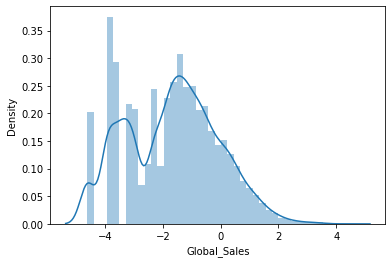

In [65]:
sns.distplot(y_lr,hist=True)

In [66]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(x_train_lr,y_train_lr)

# print intercept and coefficeint
print(lm.intercept_)
print(lm.coef_)

-142.2736620857805
[ 1.21348807e-01  3.77827835e-01  8.00597604e+00  4.00469158e-01
  2.10508516e-01  8.18385836e-02  1.32723846e+00  2.54012388e+00
 -9.44637631e-03 -3.63604934e+00 -7.29676933e+01  2.36105487e-01]


In [67]:
y_pred_lr=lm.predict(x_test_lr)
print(y_pred_lr)

[-2.29078583 -1.49012158 -1.29537402 ... -2.19464291 -2.2727513
 -2.06391913]


In [68]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test_lr,y_pred_lr)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test_lr,y_pred_lr))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y_lr)-1)/(len(y)-x_lr.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.2763587662452933
RMSE: 1.353562499307957
Adj R-square: 0.2755169150766015


# Tuning the Model Using Ridge

In [69]:
from sklearn.linear_model import Ridge

lm = Ridge()

lm.fit(x_train_lr,y_train_lr)

print(lm.intercept_)
print(lm.coef_)

11.326368206101547
[ 0.14129622  0.43177382  1.15656462  0.407137    0.21872365  0.07651706
  1.3140562   2.16568907 -0.00835881  0.08243046 -2.10621363  0.38360332]


In [70]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test_lr,y_pred_lr)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test_lr,y_pred_lr))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y_lr)-1)/(len(y)-x_lr.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.2763587662452933
RMSE: 1.353562499307957
Adj R-square: 0.2755169150766015


# LOGISTIC REGRESSSION

In [71]:
x_log=trained_data.values[:,1:-1]
y_log=trained_data.values[:,-1]

In [72]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[594 593 592 ...   0   0   0]


In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_log)
x_log=scaler.transform(x_log)

In [74]:
from sklearn.model_selection import train_test_split

#split the data into  the test and train
x_train_log, x_test_log, y_train_log, y_test_log=train_test_split(x_log,y_transformed,test_size=0.2, random_state=10)

## test_size is 20%  for less than 1000 obsevation and greater than 1000 30%

In [75]:
from sklearn.linear_model import LogisticRegression
#create a model
logisticRegr = LogisticRegression()
#fitting training data into the model
logisticRegr.fit(x_train_log,y_train_log)
y_pred_log=logisticRegr.predict(x_test_log)
#print(y_pred_log)
#print(list(zip(y_test_log,y_pred_log)))

In [76]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test_log,y_pred_log)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test_log,y_pred_log))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y_log)-1)/(len(y_log)-x_log.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8239604727975907
RMSE: 40.22354042422719
Adj R-square: 0.8237556764499


# TESTING DATA

In [77]:
test=test_data.values[:,1:]
test=scaler.transform(test)

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

model_GradientBoosting=GradientBoostingRegressor(n_estimators=250,random_state=10)



##fit the model in the data and predict the values

model_GradientBoosting.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=250, random_state=10)

In [79]:
test_pred=model_GradientBoosting.predict(test)
test_pred.shape

(1988,)

In [80]:
test_data.columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Developer', 'Rating'],
      dtype='object')

In [81]:
test_data=test_data.drop(columns=['Platform', 'Genre', 'Publisher','Genre','Developer','NA_Sales', 'EU_Sales',
       'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Rating'], axis=1)

In [82]:
test_data['Global sales']=test_pred
test_data.head()

,Name,Global sales
0,Nicktoons: MLB,0.145948
1,Shonen Jump's One Piece: Grand Battle,0.122503
2,Learn Math,0.145694
3,Nitrobike,0.157818
4,Cruise Ship Vacation Games,0.154838


In [83]:
test_data.shape

(1988, 2)

In [84]:
#test_data.to_csv('Global_Sales_For_Test_Data_dt.csv',header=True,index=None)

# WE CAN  SEE ABOVE THAT THE  DATA IS TRAINED ON  ALL THE REGRESSOR ALGORITHMS BUT WE ARE PREDICTING OR TESTING TEST DATA ON GRADIENT BOOSTING REGRESSOR AS ONE DECISION TREE IS WEAK LEARNER BUT MULTIPLE DECISION TREE MAKES STRONG LEARNER HENCE EVEN AFTER LOWEST RMSE AND HIGHEST R SQUARE ON DECISION TREE WE ARE USING GRADIENT BOOSTING AS THE MODEL IS TRAINED ENOUGH ON IT AND THERE IS NO MAJOR DIFFERENCE BETWEEN RMSE AND R SQUARE WHEN COMPARED WITH DECISION TREE.